# Calculate Asset/Hedge Split

In [1]:
import pandas_datareader as pdr
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [18]:
tickers = ['SPY', 'TLT']

start = dt.datetime(2010, 1, 1)
end = dt.datetime(2020, 1, 1)

data = pdr.get_data_yahoo(tickers, start, end)

data = data['Adj Close']

In [24]:
def evaluate_split(data, split):
    portfolio = [split, 1. - split]
    
    eval_set = ((data/data.iloc[0])*portfolio).sum(axis=1)
    
    cagr = (eval_set.iloc[-1]/eval_set.iloc[0])**(1/10) - 1

    rolling_max = eval_set.cummax()
    daily_drawdown = eval_set/rolling_max - 1
    drawdown = daily_drawdown.cummin().iloc[-1]

    log_returns = np.log(eval_set/eval_set.shift())
    volatility = log_returns.std()*(252**.5)

    return cagr, drawdown, volatility

In [26]:
evaluate_split(data, 1.)

(0.13244548148388002, -0.1934892785101756, 0.14717472883158286)

In [51]:
x = np.arange(0, 1.01, .05)

df = pd.DataFrame(x)

res = df.apply(lambda x: evaluate_split(data, x), axis=1)

df['CAGR'] = res.str[0]
df['Drawdown'] = res.str[1]
df['Volatility'] = res.str[2]

df.set_index(0, inplace=True)

In [52]:
df

,CAGR,Drawdown,Volatility
0,,,
0.00,0.072365,-0.206588,0.137488
0.05,0.076190,-0.188603,0.126469
0.10,0.079895,-0.170192,0.116135
0.15,0.083490,-0.151340,0.106566
0.20,0.086981,-0.132031,0.097879
0.25,0.090374,-0.119097,0.090228
0.30,0.093674,-0.108961,0.083810
0.35,0.096887,-0.098800,0.078848
0.40,0.100017,-0.094769,0.075563


<IPython.core.display.Javascript object>


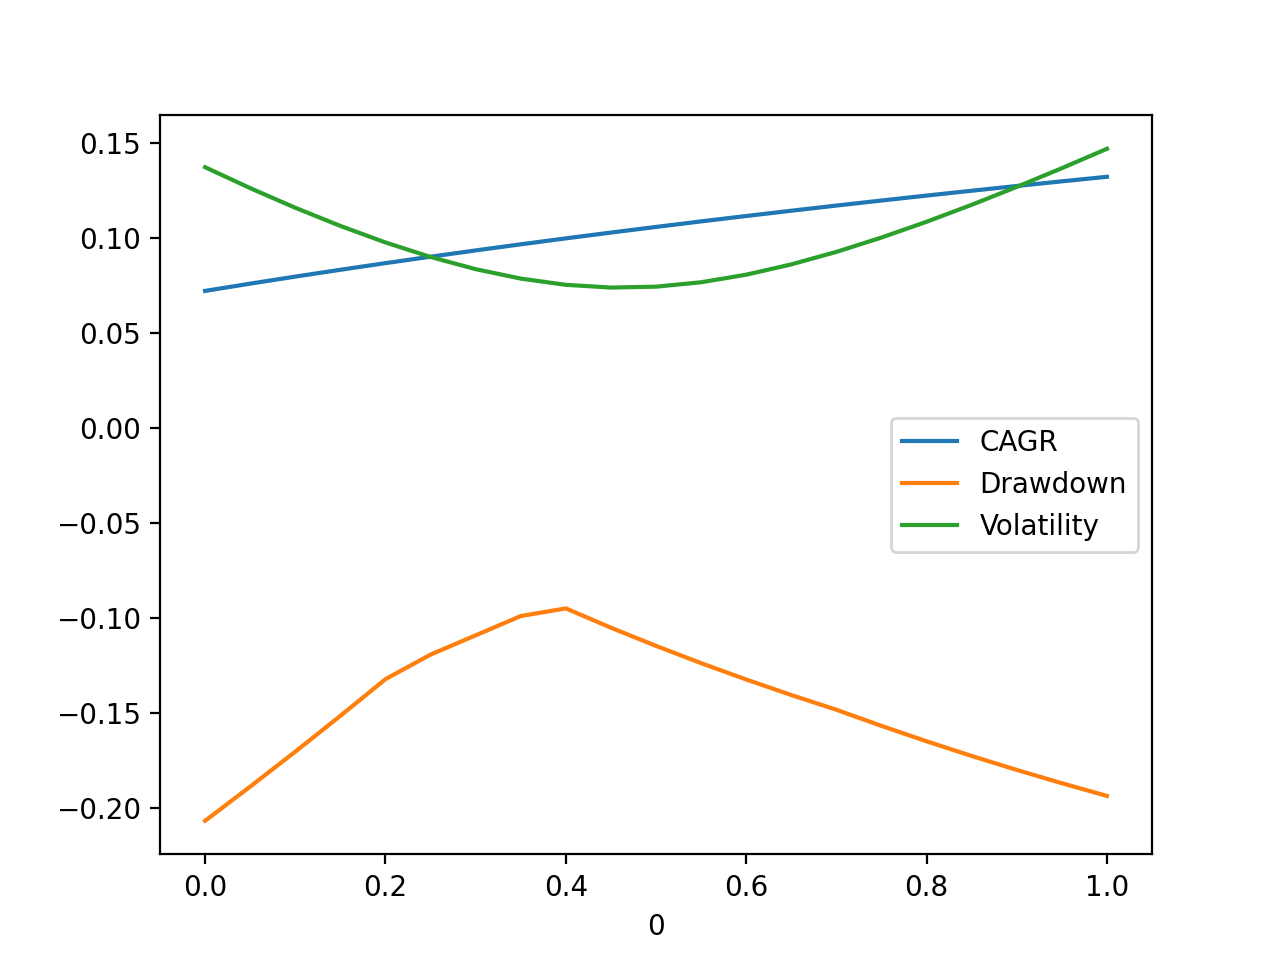

<AxesSubplot:xlabel='0'>

In [53]:
fig, ax = plt.subplots()
df.plot(ax=ax)

In [57]:
df.iloc[df['CAGR'].argmax()]

CAGR          0.132445
Drawdown     -0.193489
Volatility    0.147175
Name: 1.0, dtype: float64

In [58]:
df.iloc[df['Volatility'].argmin()]

CAGR          0.103069
Drawdown     -0.104920
Volatility    0.074123
Name: 0.45, dtype: float64

In [60]:
df.iloc[df['Drawdown'].argmax()]

CAGR          0.100017
Drawdown     -0.094769
Volatility    0.075563
Name: 0.4, dtype: float64

In [72]:
df.loc[.6:.601]

,CAGR,Drawdown,Volatility
0,,,
0.6,0.111795,-0.132198,0.080899


### Sharpe Ratio

In [76]:
sr = (df['CAGR'] - 0.013)/df['Volatility']

In [77]:
sr.argmax()

11

<IPython.core.display.Javascript object>


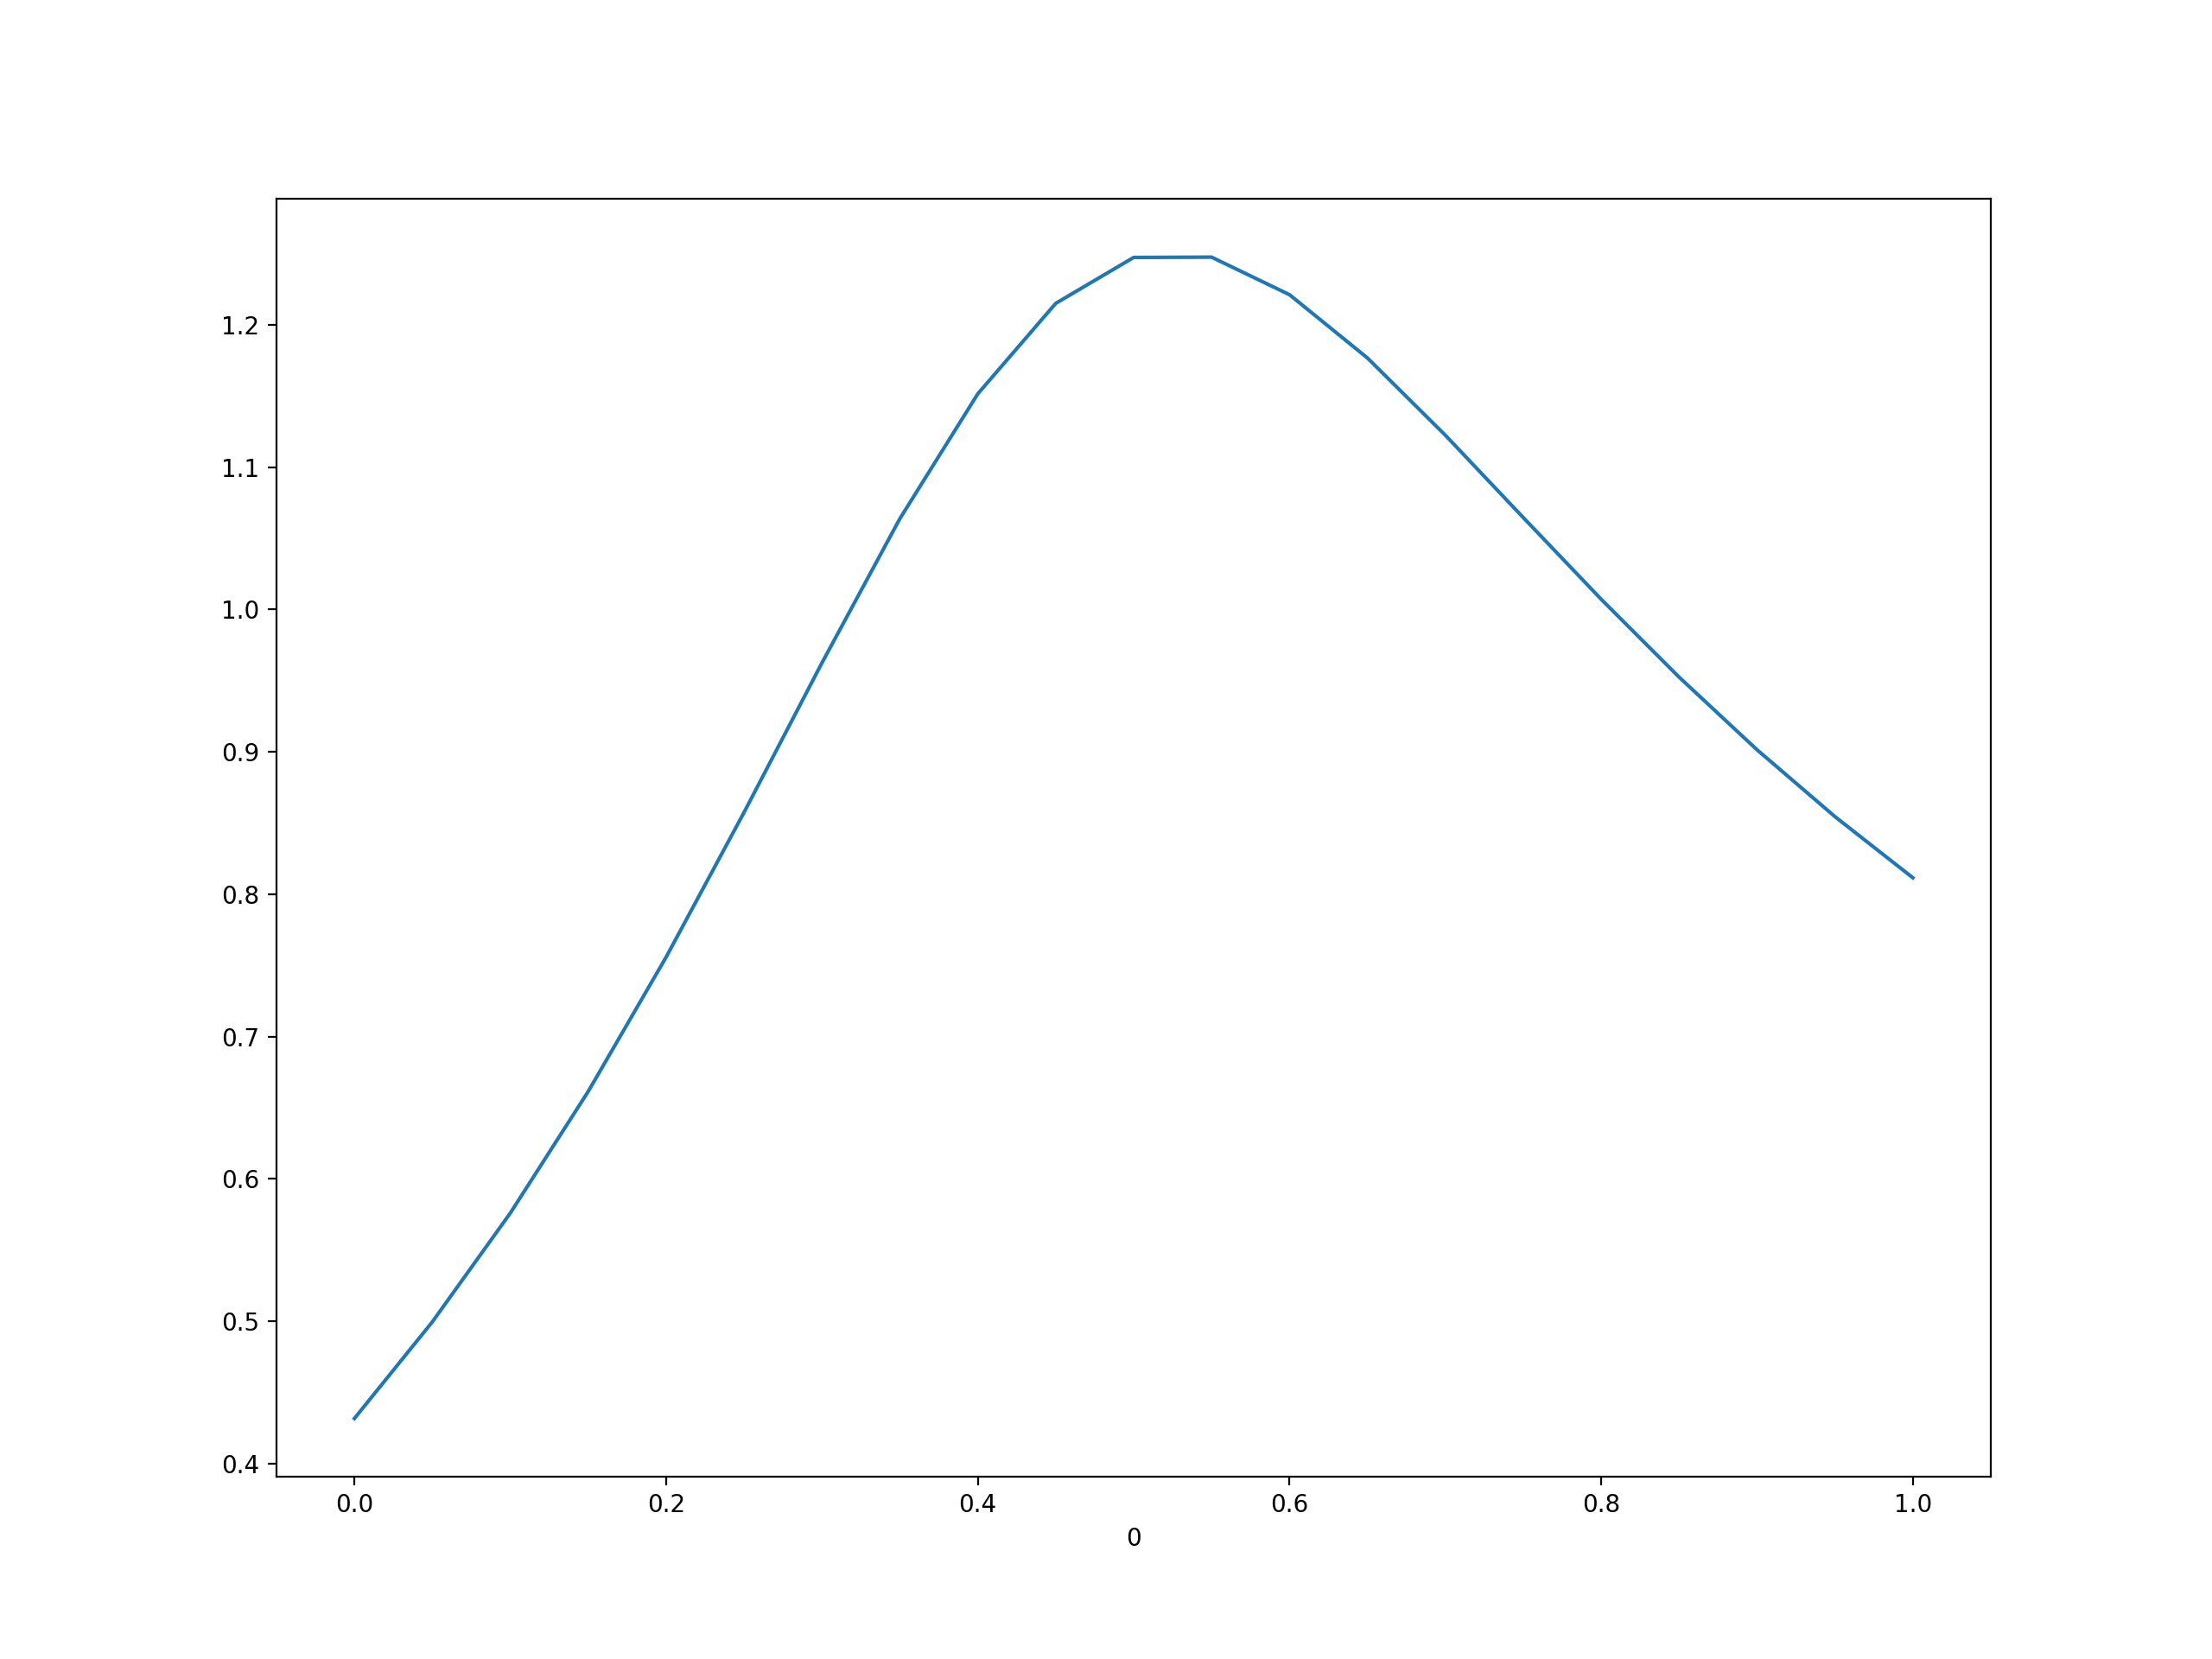

<AxesSubplot:xlabel='0'>

In [78]:
fig, ax = plt.subplots()
sr.plot(ax=ax)

In [79]:
df.iloc[11]

CAGR          0.108955
Drawdown     -0.123592
Volatility    0.076912
Name: 0.55, dtype: float64